In [152]:
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv('data_train.csv').values
df

array([[ 73,  80,  75, 152],
       [ 93,  88,  93, 185],
       [ 89,  91,  90, 180],
       [ 96,  98, 100, 196],
       [ 73,  66,  70, 142],
       [ 53,  46,  55, 101],
       [ 69,  74,  77, 149],
       [ 47,  56,  60, 115],
       [ 87,  79,  90, 175],
       [ 79,  70,  88, 164],
       [ 69,  70,  73, 141],
       [ 70,  65,  74, 141],
       [ 93,  95,  91, 184],
       [ 79,  80,  73, 152],
       [ 70,  73,  78, 148],
       [ 93,  89,  96, 192],
       [ 78,  75,  68, 147],
       [ 81,  90,  93, 183],
       [ 88,  92,  86, 177],
       [ 78,  83,  77, 159],
       [ 82,  86,  90, 177],
       [ 86,  82,  89, 175],
       [ 78,  83,  85, 175]])

In [154]:
x1 = df[:,0]
x2 = df[:,1]
x3 = df[:,2]
X_train = df[:,:3]
y_train = df[:,3]
print(X_train.shape, y_train.shape)

(23, 3) (23,)


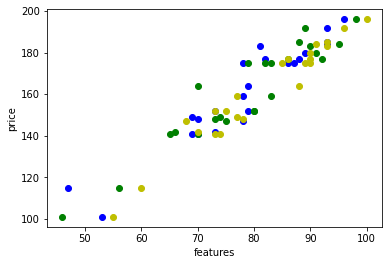

In [155]:
%matplotlib inline
plt.xlabel('features')
plt.ylabel('price')
plt.scatter(x1,y_train,c='b')
plt.scatter(x2,y_train,c='g')
plt.scatter(x3,y_train,c='y')
plt.show()

In [156]:
X_train = np.c_[np.ones((len(X_train),1)),X_train]

In [157]:
print(X_train.shape, y_train.shape)


(23, 4) (23,)


In [158]:
def predict(x,theta):
    return np.dot(x, theta)

In [159]:
def error(x,y,theta):
    y_pre = predict(x,theta)
    return 1/len(x)*(y-y_pre)**2

In [160]:
def compute_cost(x,y,theta,lambdaa):
    errors = error(x,y,theta)
    return 1/(2*m)*np.dot(errors.T, errors) + lambdaa/2 *theta.T@theta

In [161]:
def gradient_descent(x,y,theta,learning_rate,num_iter,m,lambdaa):  
    cost_list = []
    theta_list = []
    for i in range(num_iter):
        y_pre = predict(x,theta)
        errors = error(x,y,theta)
        cost = compute_cost(x,y,theta,lambdaa)
        cost_list.append(cost)
        theta-= learning_rate*np.dot(np.dot(x, theta) - y, x) / m + lambdaa*theta
        theta_list.append(theta)
    return theta_list, cost_list

In [162]:
learning_rate = 0.0001
m = len(y_train)  
theta = np.random.rand(4)  #initializing theta with some random values
num_iter = 200
lambdaa = .001
#print(error(x_train, y_train,theta))


In [163]:
theta_list, cost_list = gradient_descent(X_train,y_train,theta,learning_rate,num_iter,m,lambdaa)
print(np.array(cost_list))

[9.85711502e+03 7.43563532e+03 5.92572951e+03 4.45504372e+03
 3.56725082e+03 2.67156810e+03 2.15122829e+03 1.60389903e+03
 1.30018769e+03 9.64341086e+02 7.88050505e+02 5.80911645e+02
 4.79360569e+02 3.50785372e+02 2.92919863e+02 2.12471865e+02
 1.80026128e+02 1.29188455e+02 1.11446421e+02 7.89232914e+01
 6.96179022e+01 4.84964921e+01 4.39769034e+01 3.00105296e+01
 2.81604896e+01 1.87284036e+01 1.83291232e+01 1.18050856e+01
 1.21607405e+01 7.52891918e+00 8.24707469e+00 4.86782051e+00
 5.73106858e+00 3.19768514e+00 4.08886602e+00 2.13973835e+00
 2.99856058e+00 1.46304402e+00 2.26104813e+00 1.02600129e+00
 1.75220274e+00 7.41183132e-01 1.39390672e+00 5.54161217e-01
 1.13644716e+00 4.30720034e-01 9.47778003e-01 3.49110482e-01
 8.06939052e-01 2.95336378e-01 6.99999275e-01 2.60270825e-01
 6.17538678e-01 2.37880165e-01 5.53072102e-01 2.24121089e-01
 5.02052867e-01 2.16249027e-01 4.61235719e-01 2.12379443e-01
 4.28264209e-01 2.11205908e-01 4.01399565e-01 2.11816303e-01
 3.79339730e-01 2.135711

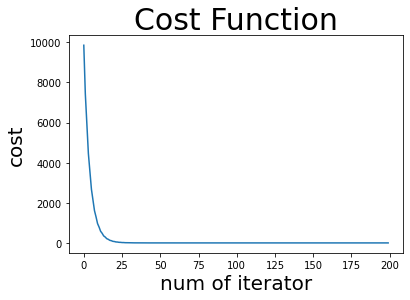

In [164]:
plt.title('Cost Function', size = 30)
plt.xlabel('num of iterator', size = 20)
plt.ylabel('cost', size = 20)
plt.plot(cost_list)
plt.show()

Ta suy ra theta

In [165]:
new_theta = theta_list[-1]
print(new_theta.shape)

(4,)


# Test

In [166]:
df_test = pd.read_csv('data_test.csv').values

In [167]:
X_test = df_test[:,:3]
y_test = df_test[:,3]
X_test = np.c_[np.ones((len(X_test),1)),X_test]

In [168]:
Y_predict_from_test = predict(X_test,new_theta)

In [169]:
print("ta du doan diem tu model",Y_predict_from_test) 
print("diem thuc te", y_test)

ta du doan diem tu model [151.82105395 191.14468193]
diem thuc te [149 192]
